### Data Exploration
In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_


In [1]:
# Import libraries
from datetime import datetime as dt
import numpy as np
import pandas as pd
from scipy import stats
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

    %matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
# Read data
original = pd.read_csv("data/train.csv")
print "Data read successfully!"

Data read successfully!


### Data preparation

In [3]:
# 1. Drop state_changed_at and created_at (launched_at and deadline are the dates that matter)
prepared = original.drop(['created_at', 'state_changed_at'], axis=1)
# 2. Replace na to empty strings on name, desc and keywords
prepared['name'] = prepared['name'].fillna('')
prepared['desc'] = prepared['desc'].fillna('')
prepared['keywords'] = prepared['keywords'].fillna('')
# 3. Convert data types
prepared['launched_at'] = prepared['launched_at'].apply(dt.fromtimestamp)
prepared['deadline'] = prepared['deadline'].apply(dt.fromtimestamp)
# 4. Create attribute days open (deadline - launched at)
prepared['days_open'] = [x.days for x in (prepared['deadline'] - prepared['launched_at'])]

In [4]:
display(prepared)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,launched_at,backers_count,final_status,days_open
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.000,drawing-for-dollars,False,US,USD,2009-05-03 03:59:59,2009-04-24 16:52:03,3,1,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.000,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 20:10:00,2009-04-29 00:26:32,2,0,16
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.000,mr-squiggles,False,US,USD,2009-05-22 18:26:00,2009-05-12 18:39:58,0,0,9
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.000,help-me-write-my-second-novel,False,US,USD,2009-05-28 21:09:00,2009-04-28 21:58:50,18,1,29
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.000,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 08:38:00,2009-05-01 09:22:21,1,0,29
5,kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.000,daily-digest,False,US,USD,2009-05-31 21:20:00,2009-05-04 16:14:28,14,0,27
6,kkst1468954715,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,250.000,igoozex-free-iphone-app,False,US,USD,2009-06-01 13:00:00,2009-05-07 19:45:08,2,0,24
7,kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.000,drive-a-faster-car-20,False,US,USD,2009-06-04 01:00:00,2009-05-04 17:51:31,32,1,30
8,kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.000,lostles-at-tinys-giant,False,US,USD,2009-06-06 02:00:00,2009-05-04 20:48:21,44,0,32
9,kkst890976740,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,3500.000,choose-your-own-adventure-a-robot-painting-series,False,US,USD,2009-06-13 23:29:00,2009-05-14 00:57:40,18,0,30


#### Scalar Variables

In [5]:
prepared[['goal','backers_count','days_open']].describe()

,goal,backers_count,days_open
count,108129.000,108129.000,108129.000
mean,36726.229,123.517,33.881
std,971902.705,1176.745,12.939
min,0.010,0.000,1.000
25%,2000.000,2.000,29.000
50%,5000.000,17.000,30.000
75%,13000.000,65.000,36.000
max,100000000.000,219382.000,91.000


##### Outliers
 There is a huge standard deviation on goal attribute, 
 there must be some outliers like the max value that is USD 100mi.
 Same for backers count.
 Lets see an histogram for goal and another for backers count .
 

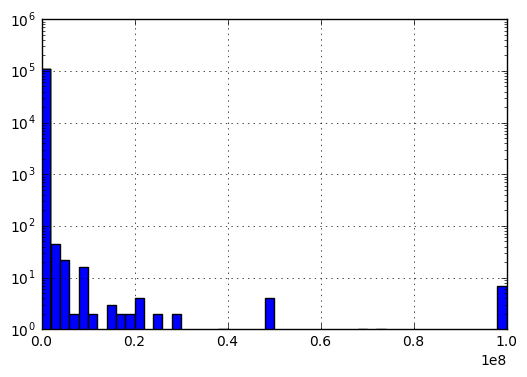

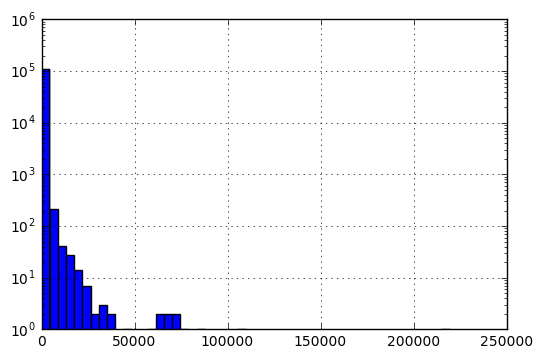

In [6]:
prepared['goal'].hist(bins=50,log=True)
plt.figure()
prepared['backers_count'].hist(bins=50,log=True)
plt.figure()

600.0

36391.999999999971

319.0

17.0

60.0

,goal,backers_count,days_open
count,77076.000,77076.000,77076.000
mean,7539.226,43.612,34.272
std,7554.972,60.423,10.407
min,600.000,0.000,17.000
25%,2200.000,3.000,30.000
50%,5000.000,18.000,30.000
75%,10000.000,60.000,36.000
max,36390.000,319.000,60.000


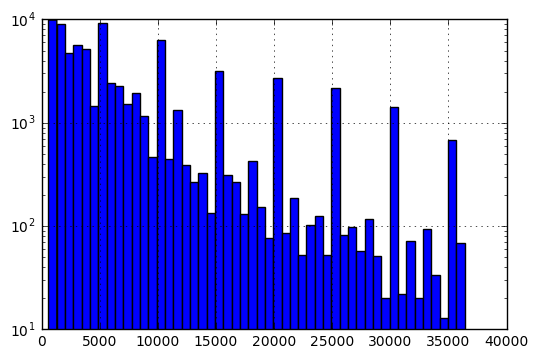

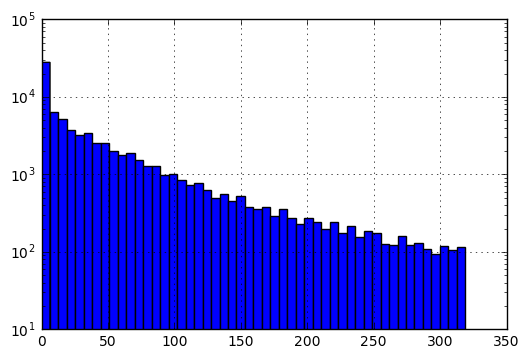

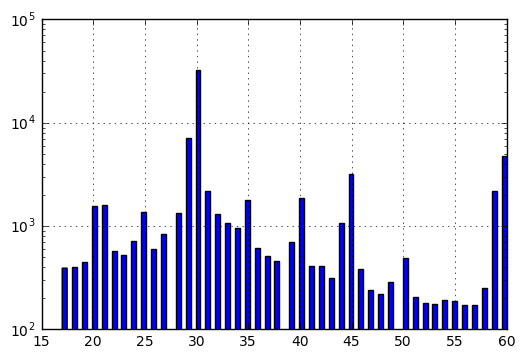

In [7]:
# Removing outliers
no_outliers = prepared
# 1. For goal
lower_limit, upper_limit = (no_outliers['goal'].quantile(0.1), no_outliers['goal'].quantile(0.9))
display(lower_limit, upper_limit)
no_outliers = no_outliers[no_outliers['goal'] >= lower_limit]
no_outliers = no_outliers[no_outliers['goal'] <= upper_limit]

# 2. For backers_count
upper_limit = (no_outliers['backers_count'].quantile(0.95))
display(upper_limit)
no_outliers = no_outliers[no_outliers['backers_count'] <= upper_limit]

lower_limit, upper_limit = (no_outliers['days_open'].quantile(0.05), no_outliers['days_open'].quantile(0.95))
display(lower_limit, upper_limit)
no_outliers = no_outliers[no_outliers['days_open'] >= lower_limit]
no_outliers = no_outliers[no_outliers['days_open'] <= upper_limit]

# Describe data again and create histograms
display(no_outliers[['goal','backers_count','days_open']].describe())
no_outliers['goal'].hist(bins=50,log=True)
plt.figure()
no_outliers['backers_count'].hist(bins=50,log=True)
plt.figure()
no_outliers['days_open'].hist(bins=90,log=True)
plt.figure()

#### Categorical Variables

disable_communication
False    76910
True       166
Name: project_id, dtype: int64

country
AU     1236
CA     2587
DK       89
GB     5749
IE       73
NL      469
NO       58
NZ      263
SE       94
US    66458
Name: project_id, dtype: int64

currency
AUD     1236
CAD     2587
DKK       89
EUR      542
GBP     5749
NOK       58
NZD      263
SEK       94
USD    66458
Name: project_id, dtype: int64

final_status
0    54778
1    22298
Name: project_id, dtype: int64

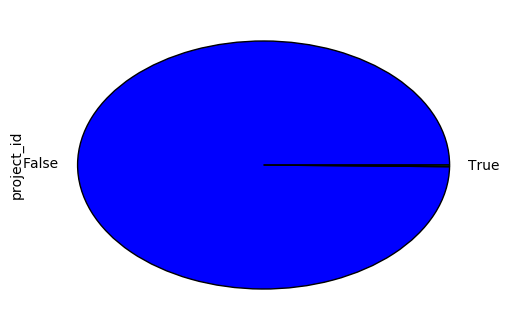

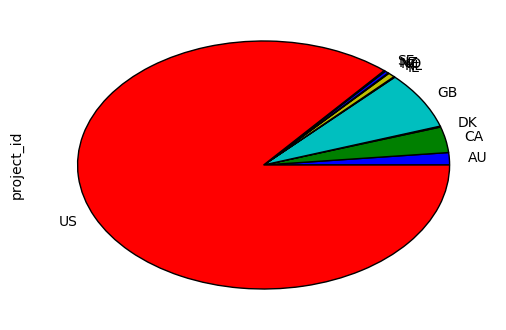

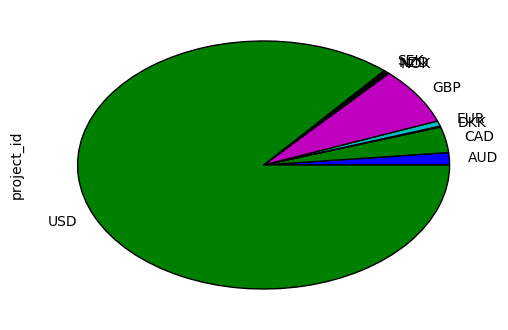

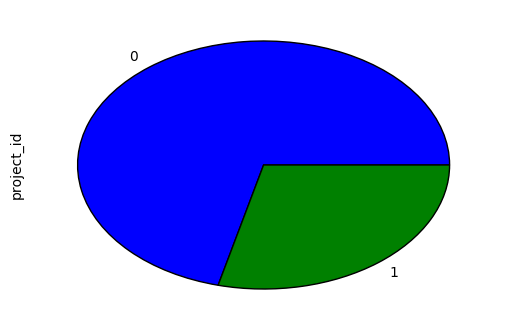

In [8]:
display(no_outliers.groupby('disable_communication').count()['project_id'])
no_outliers.groupby('disable_communication').count()['project_id'].plot.pie()
plt.figure()
display(no_outliers.groupby('country').count()['project_id'])
no_outliers.groupby('country').count()['project_id'].plot.pie()
plt.figure()
display(no_outliers.groupby('currency').count()['project_id'])
no_outliers.groupby('currency').count()['project_id'].plot.pie()
plt.figure()
display(no_outliers.groupby('final_status').count()['project_id'])
no_outliers.groupby('final_status').count()['project_id'].plot.pie()
plt.figure()


#### Period

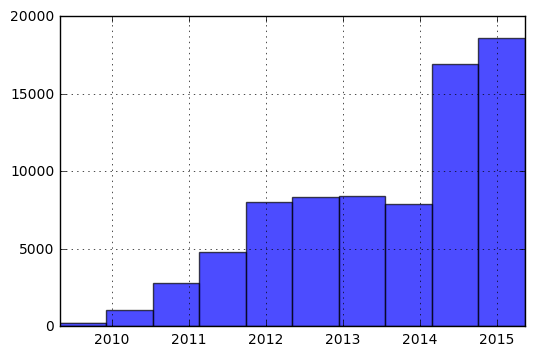

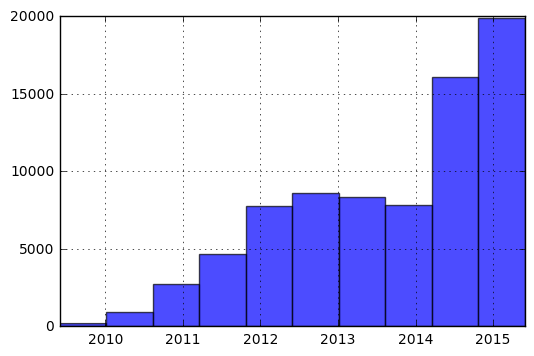

In [9]:
no_outliers['launched_at'].hist(alpha=0.7)
plt.figure()
no_outliers['deadline'].hist(alpha=0.7)
plt.figure()

In [10]:
display(no_outliers)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,launched_at,backers_count,final_status,days_open
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.000,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 08:38:00,2009-05-01 09:22:21,1,0,29
5,kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.000,daily-digest,False,US,USD,2009-05-31 21:20:00,2009-05-04 16:14:28,14,0,27
7,kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.000,drive-a-faster-car-20,False,US,USD,2009-06-04 01:00:00,2009-05-04 17:51:31,32,1,30
8,kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.000,lostles-at-tinys-giant,False,US,USD,2009-06-06 02:00:00,2009-05-04 20:48:21,44,0,32
9,kkst890976740,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,3500.000,choose-your-own-adventure-a-robot-painting-series,False,US,USD,2009-06-13 23:29:00,2009-05-14 00:57:40,18,0,30
10,kkst2053381363,Anatomy of a Credibility Meltdown — a book abo...,I am an independent PR practitioner with a lon...,30000.000,anatomy-of-a-credibility-meltdown-a-book-about...,False,US,USD,2009-06-14 21:36:00,2009-05-11 12:34:54,7,0,34
12,kkst934689279,"Indie Nerd Board Game, Needs Player Character ...",pictured here is the character we would like t...,1500.000,indie-nerd-board-game-needs-hero-miniature-scu...,False,US,USD,2009-06-15 02:10:00,2009-05-15 03:39:20,28,1,30
15,kkst485555421,Project Pedal,Project Pedal is an independent documentary ab...,1000.000,project-pedal,False,US,USD,2009-06-21 00:59:00,2009-05-18 20:40:18,20,1,33
18,kkst910550425,"Run, Blago Run! Show",A 3-day pop-up art gallery of work depicting e...,3500.000,run-blago-run-show,False,US,USD,2009-07-01 01:00:00,2009-06-07 12:20:12,54,0,23
19,kkst139451001,It Might Become a Movie,We are broke film students who have created a ...,1000.000,it-might-become-a-movie,False,US,USD,2009-07-01 01:00:00,2009-05-29 13:56:20,23,1,32


In [12]:
no_outliers.to_csv('data/processed.csv', index=False)